In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 
import numpy as np

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LinearRegression

In [7]:
import scale
import psf

# load data

In [8]:
psf_coords = np.loadtxt("psf_phase_x.txt")
psf_y = np.loadtxt("psf_phase_y.txt")

X = psf_coords.copy()
y = psf_y.copy()

# do this shape manipulation
# so that each parameter (1st index)
# indexes an (N, 1) array
# makes it easier to pass later in the fitting code
y = y.T[..., np.newaxis]

del psf_coords, psf_y

In [9]:
X.shape

(40, 3)

In [10]:
y.shape

(5, 40, 1)

In [11]:
?psf.fit

Signature:
psf.fit(
    X,
    y,
    dataname,
    parname,
    model,
    scaleX=False,
    scaleY=False,
    showplot=True,
)
Docstring:
dataname {str}: used to make output directory

model {instance of sklearn.pipeline.make_pipeline}
File:      /nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/psf.py
Type:      function


working: a1
making output dir: phase
making output sub-dir: phase/a1
saving model
saving model: phase/a1/model.pickle


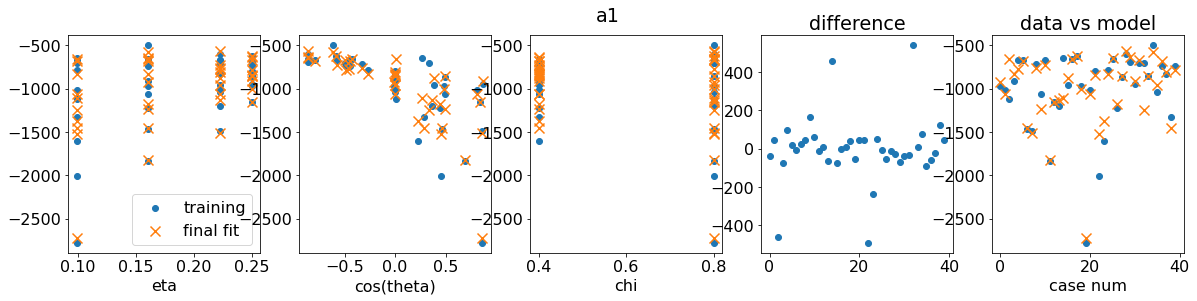

working: a2
making output dir: phase
making output sub-dir: phase/a2
saving model
saving model: phase/a2/model.pickle


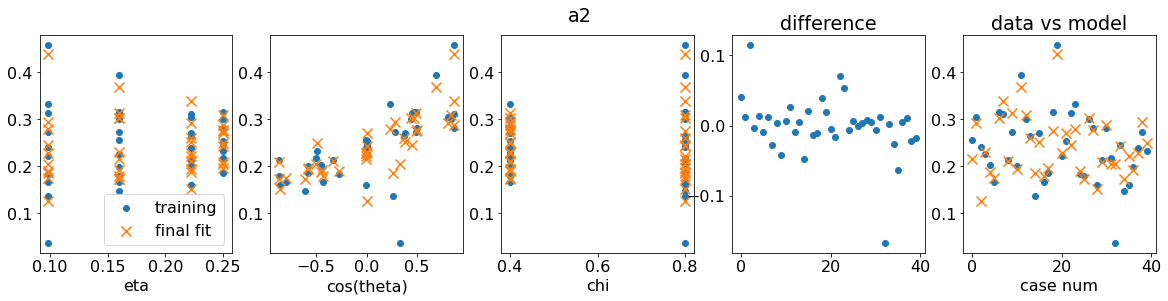

working: a3
making output dir: phase
making output sub-dir: phase/a3
saving model
saving model: phase/a3/model.pickle


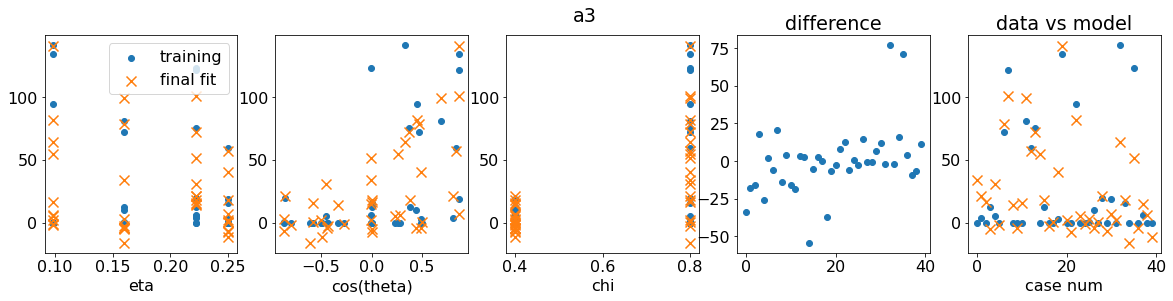

working: a4
making output dir: phase
making output sub-dir: phase/a4
saving model
saving model: phase/a4/model.pickle


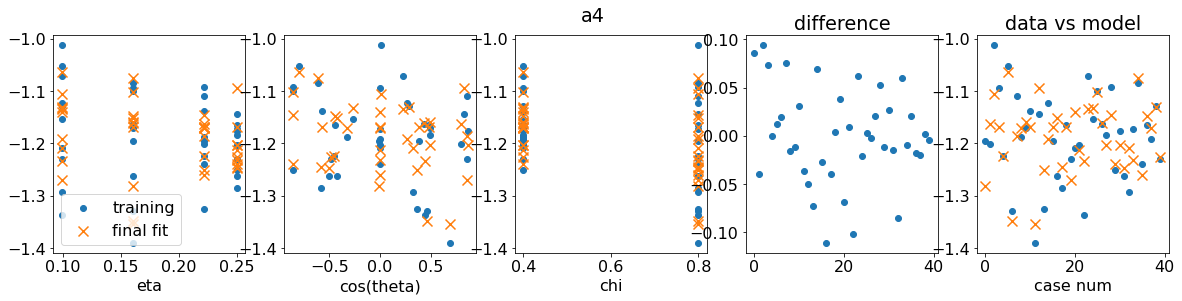

working: a5
making output dir: phase
making output sub-dir: phase/a5
saving model
saving model: phase/a5/model.pickle


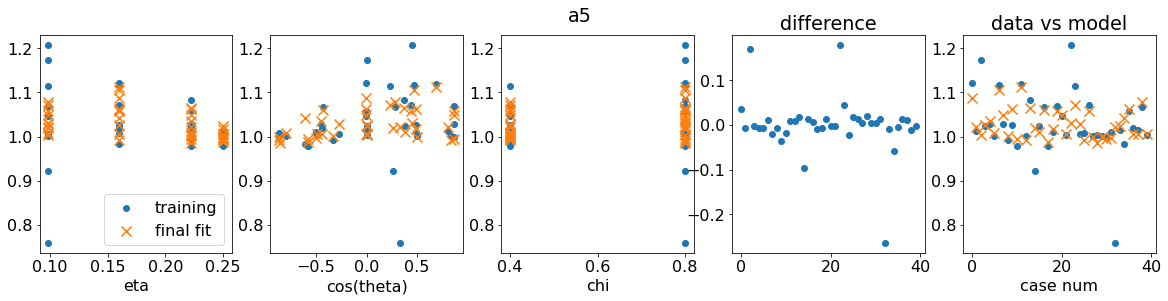

In [26]:
model = make_pipeline(PolynomialFeatures(degree=3), Lasso(alpha=1e-3, max_iter=1e8))
# model = make_pipeline(PolynomialFeatures(degree=5), Lasso(alpha=1e-3, max_iter=1e8))
# model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression(fit_intercept=True))
# model = make_pipeline(PolynomialFeatures(degree=4), Ridge())
# model = make_pipeline(PolynomialFeatures(degree=4), ElasticNet())
# model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression(fit_intercept=True))

fits = []
parnames = ['a1', 'a2', 'a3', 'a4', 'a5']
for i, parname in enumerate(parnames):
    print(f"working: {parname}")
    fits.append(psf.fit(X, y[i], "phase", parname, model, scaleX=True, scaleY=True))

working: a1
making output dir: phase_high
making output sub-dir: phase_high/a1
saving model
saving model: phase_high/a1/model.pickle


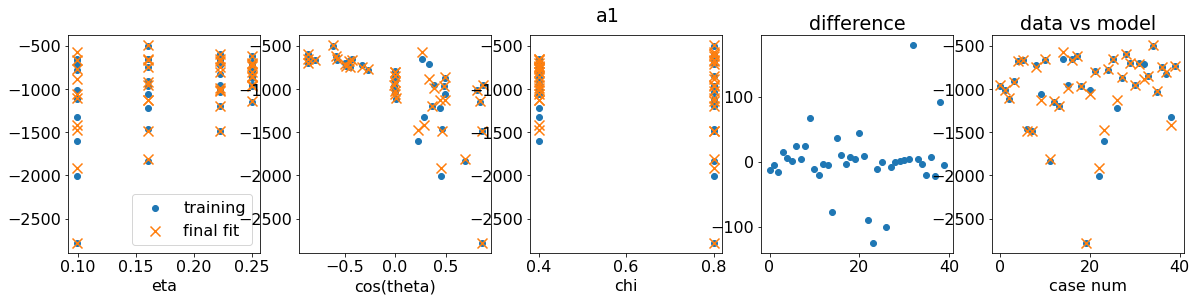

working: a2
making output dir: phase_high
making output sub-dir: phase_high/a2
saving model
saving model: phase_high/a2/model.pickle


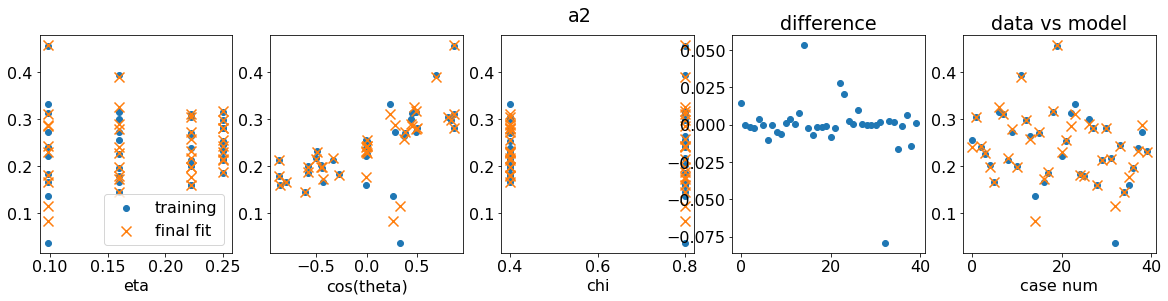

working: a3
making output dir: phase_high
making output sub-dir: phase_high/a3
saving model
saving model: phase_high/a3/model.pickle


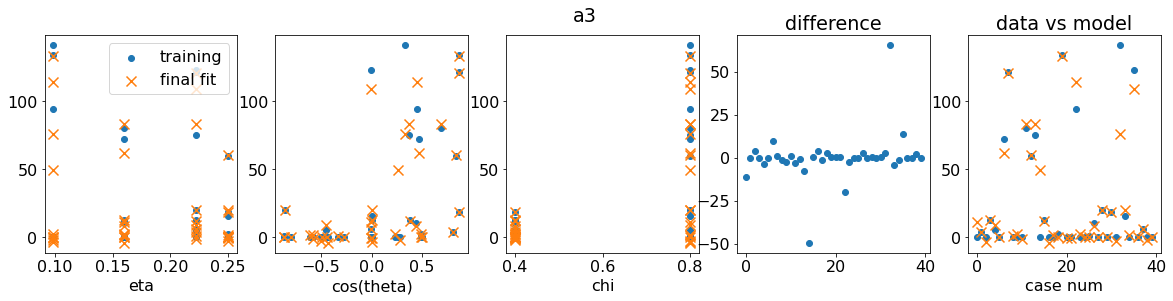

working: a4
making output dir: phase_high
making output sub-dir: phase_high/a4
saving model
saving model: phase_high/a4/model.pickle


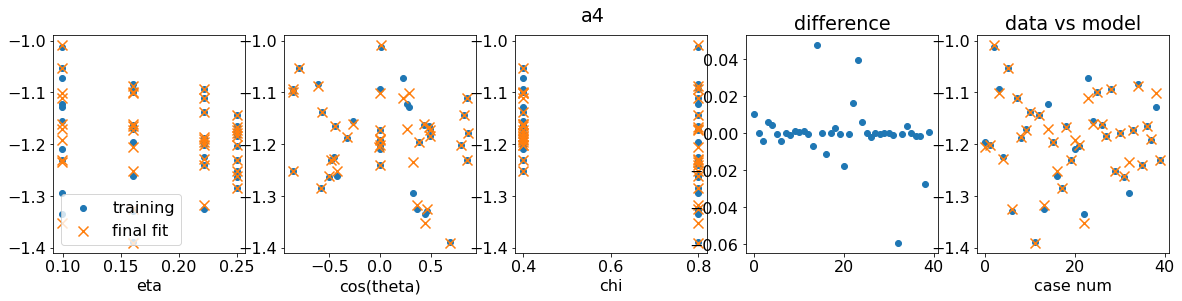

working: a5
making output dir: phase_high
making output sub-dir: phase_high/a5
saving model
saving model: phase_high/a5/model.pickle


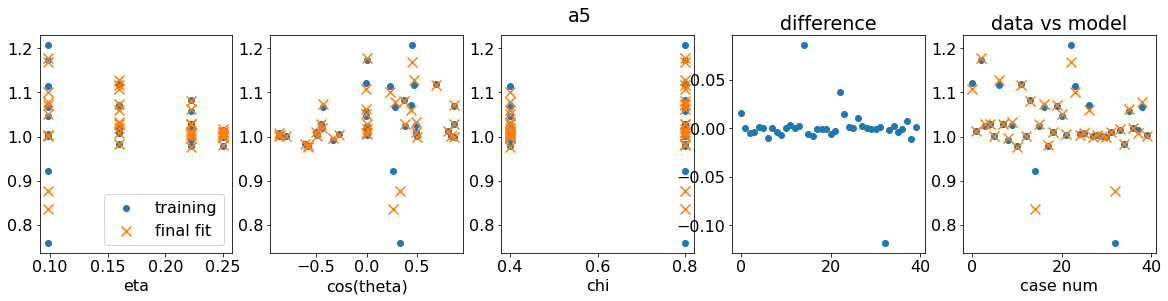

In [33]:
model_high = make_pipeline(PolynomialFeatures(degree=7), Lasso(alpha=0.001, max_iter=1e7))
#     model = make_pipeline(PolynomialFeatures(degree=4), Ridge())
#     model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression(fit_intercept=True))
#     model = make_pipeline(PolynomialFeatures(degree=10), LinearRegression(fit_intercept=True))

fits = []
parnames = ['a1', 'a2', 'a3', 'a4', 'a5']
for i, parname in enumerate(parnames):
    print(f"working: {parname}")
    fits.append(psf.fit(X, y[i], "phase_high", parname, model_high, scaleX=True, scaleY=True))